In [70]:
import sys
from math import sqrt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import KFold
from sklearn import ensemble, preprocessing
from sklearn import linear_model as lm
from sklearn.metrics import mean_squared_error as mse

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [64]:
print("Reading the files into dataframes..")
train_file = r"train.csv"
test_file = r"test.csv"
sub_file = r"submission.csv"

train = pd.read_csv(train_file)
test = pd.read_csv(test_file)
submission = pd.read_csv(sub_file)

train_orig = train.copy()
test_orig = test.copy()
submission_orig = submission.copy()

Reading the files into dataframes..


In [9]:
display(train.head(), test.head())

,WeekEnding_Date,Kolkata_Average_Price,Kolkata_Ref_Price,Bangalore_Average_Price,Bangalore_Ref_Price,Cochin_Average_Price,Cochin_Ref_Price,Darjeeling_Average_Price,Darjeeling_Ref_Price,Ernakulam_Average_Price,Ernakulam_Ref_Price,Siliguri_Average_Price,Siliguri_Ref_Price,Guwahati_Average_Price,Guwahati_Ref_Price,Average
0,03/01/09,99.01,79.79,N.S.,76.19,84.02,70.07,81.66,57.83,68.94,51.67,70.74,53.88,65.55,46.75,69.700000
1,10/01/09,97.74,78.73,87.48,73.97,82.72,68.17,83.31,58.02,67.24,52.23,70.47,53.39,67.39,46.84,70.550000
2,17/01/09,95.95,71.01,87.66,71.01,80.58,67.16,82.25,57.49,69.64,52.48,71.66,53.18,69.51,48.04,69.830000
3,24/01/09,94.14,73.38,85.69,65.66,N.S.,65.57,80.87,54.59,N.S.,53.43,71.12,52.07,69.14,48.5,67.846667
4,31/01/09,91.45,70.39,N.S.,64.99,79.27,62.09,80.76,57.06,69.65,53.38,72.3,52.5,69.39,50.33,67.196923


,WeekEnding_Date,Kolkata_Average_Price,Kolkata_Ref_Price,Bangalore_Average_Price,Bangalore_Ref_Price,Cochin_Average_Price,Cochin_Ref_Price,Darjeeling_Average_Price,Darjeeling_Ref_Price,Ernakulam_Average_Price,Ernakulam_Ref_Price,Siliguri_Average_Price,Siliguri_Ref_Price,Guwahati_Average_Price,Guwahati_Ref_Price,Average
0,15/06/19,NaN,165.87,154.08,160.82,NaN,NaN,116.45,112.82,91.82,NaN,102.30,NaN,83.07,65.34,NaN
1,22/06/19,171.35,173.12,NaN,NaN,NaN,NaN,NaN,NaN,90.68,76.34,NaN,NaN,81.34,NaN,NaN
2,29/06/19,NaN,NaN,156.14,NaN,NaN,150.39,NaN,NaN,NaN,NaN,96.84,NaN,NaN,NaN,NaN
3,06/07/19,NaN,NaN,158.04,NaN,NaN,146.68,111.24,111.47,NaN,NaN,97.87,NaN,NaN,NaN,NaN
4,13/07/19,NaN,NaN,157.55,163.85,NaN,144.87,NaN,111.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
train.isna().sum()

WeekEnding_Date             0
Kolkata_Average_Price       0
Kolkata_Ref_Price           2
Bangalore_Average_Price     0
Bangalore_Ref_Price         2
Cochin_Average_Price        0
Cochin_Ref_Price            3
Darjeeling_Average_Price    0
Darjeeling_Ref_Price        2
Ernakulam_Average_Price     0
Ernakulam_Ref_Price         1
Siliguri_Average_Price      1
Siliguri_Ref_Price          1
Guwahati_Average_Price      0
Guwahati_Ref_Price          0
Average                     0
dtype: int64

In [11]:
test.isna().sum()

WeekEnding_Date              0
Kolkata_Average_Price       20
Kolkata_Ref_Price           20
Bangalore_Average_Price     20
Bangalore_Ref_Price         20
Cochin_Average_Price        20
Cochin_Ref_Price            20
Darjeeling_Average_Price    20
Darjeeling_Ref_Price        20
Ernakulam_Average_Price     20
Ernakulam_Ref_Price         20
Siliguri_Average_Price      20
Siliguri_Ref_Price          20
Guwahati_Average_Price      20
Guwahati_Ref_Price          20
Average                     29
dtype: int64

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   WeekEnding_Date           544 non-null    object 
 1   Kolkata_Average_Price     544 non-null    object 
 2   Kolkata_Ref_Price         542 non-null    object 
 3   Bangalore_Average_Price   544 non-null    object 
 4   Bangalore_Ref_Price       542 non-null    object 
 5   Cochin_Average_Price      544 non-null    object 
 6   Cochin_Ref_Price          541 non-null    object 
 7   Darjeeling_Average_Price  544 non-null    object 
 8   Darjeeling_Ref_Price      542 non-null    object 
 9   Ernakulam_Average_Price   544 non-null    object 
 10  Ernakulam_Ref_Price       543 non-null    object 
 11  Siliguri_Average_Price    543 non-null    object 
 12  Siliguri_Ref_Price        543 non-null    object 
 13  Guwahati_Average_Price    544 non-null    object 
 14  Guwahati_R

In [65]:
train = pd.concat([train['WeekEnding_Date'],train.drop(columns = 'WeekEnding_Date').apply(pd.to_numeric,errors='coerce')],axis=1)
test = pd.concat([test['WeekEnding_Date'],test.drop(columns = 'WeekEnding_Date').apply(pd.to_numeric,errors='coerce')],axis=1)
train.fillna(0, inplace=True)
test.fillna(0, inplace=True)
print(train.isna().sum(), test.isna().sum())
print(train.head())

WeekEnding_Date             0
Kolkata_Average_Price       0
Kolkata_Ref_Price           0
Bangalore_Average_Price     0
Bangalore_Ref_Price         0
Cochin_Average_Price        0
Cochin_Ref_Price            0
Darjeeling_Average_Price    0
Darjeeling_Ref_Price        0
Ernakulam_Average_Price     0
Ernakulam_Ref_Price         0
Siliguri_Average_Price      0
Siliguri_Ref_Price          0
Guwahati_Average_Price      0
Guwahati_Ref_Price          0
Average                     0
dtype: int64 WeekEnding_Date             0
Kolkata_Average_Price       0
Kolkata_Ref_Price           0
Bangalore_Average_Price     0
Bangalore_Ref_Price         0
Cochin_Average_Price        0
Cochin_Ref_Price            0
Darjeeling_Average_Price    0
Darjeeling_Ref_Price        0
Ernakulam_Average_Price     0
Ernakulam_Ref_Price         0
Siliguri_Average_Price      0
Siliguri_Ref_Price          0
Guwahati_Average_Price      0
Guwahati_Ref_Price          0
Average                     0
dtype: int64
  WeekEnding_D

In [66]:
print("Processing Dates..")

train["Date_mod"] = pd.to_datetime(train['WeekEnding_Date'])
test["Date_mod"] = pd.to_datetime(test['WeekEnding_Date'])

train["DayOfMonth"] = train["Date_mod"].apply(lambda x: x.day)
test["DayOfMonth"] = test["Date_mod"].apply(lambda x: x.day)
train["Month"] = train["Date_mod"].apply(lambda x: x.month)
test["Month"] = test["Date_mod"].apply(lambda x: x.month)
train["Year"] = train["Date_mod"].apply(lambda x: x.year)
test["Year"] = test["Date_mod"].apply(lambda x: x.year)
#train["Hour"] = train["Date"].apply(lambda x: x.hour)
#test["Hour"] = test["Date"].apply(lambda x: x.hour)
train["WeekDay"] = train["Date_mod"].apply(lambda x: x.weekday())
test["WeekDay"] = test["Date_mod"].apply(lambda x: x.weekday())
train["WeekNo"] = train["Date_mod"].apply(lambda x: x.isocalendar()[1])
test["WeekNo"] = test["Date_mod"].apply(lambda x: x.isocalendar()[1])
train["DayOfYear"] = train["Date_mod"].apply(lambda x: x.timetuple().tm_yday)
test["DayOfYear"] = test["Date_mod"].apply(lambda x: x.timetuple().tm_yday)
train["DayCount"] = train["Date_mod"].apply(lambda x: x.toordinal())
test["DayCount"] = test["Date_mod"].apply(lambda x: x.toordinal())

train_tmp1 = train.copy()
test_tmp1 = test.copy()

train.drop(["WeekEnding_Date","Date_mod"], axis=1, inplace=True)
test.drop(["WeekEnding_Date","Date_mod"], axis=1, inplace=True)

print(train.shape, test.shape)
display(train.head())
display(test.head())

Processing Dates..
(544, 22) (29, 22)


,Kolkata_Average_Price,Kolkata_Ref_Price,Bangalore_Average_Price,Bangalore_Ref_Price,Cochin_Average_Price,Cochin_Ref_Price,Darjeeling_Average_Price,Darjeeling_Ref_Price,Ernakulam_Average_Price,Ernakulam_Ref_Price,...,Guwahati_Average_Price,Guwahati_Ref_Price,Average,DayOfMonth,Month,Year,WeekDay,WeekNo,DayOfYear,DayCount
0,99.01,79.79,0.00,76.19,84.02,70.07,81.66,57.83,68.94,51.67,...,65.55,46.75,69.700000,1,3,2009,6,9,60,733467
1,97.74,78.73,87.48,73.97,82.72,68.17,83.31,58.02,67.24,52.23,...,67.39,46.84,70.550000,1,10,2009,3,40,274,733681
2,95.95,71.01,87.66,71.01,80.58,67.16,82.25,57.49,69.64,52.48,...,69.51,48.04,69.830000,17,1,2009,5,3,17,733424
3,94.14,73.38,85.69,65.66,0.00,65.57,80.87,54.59,0.00,53.43,...,69.14,48.50,67.846667,24,1,2009,5,4,24,733431
4,91.45,70.39,0.00,64.99,79.27,62.09,80.76,57.06,69.65,53.38,...,69.39,50.33,67.196923,31,1,2009,5,5,31,733438


,Kolkata_Average_Price,Kolkata_Ref_Price,Bangalore_Average_Price,Bangalore_Ref_Price,Cochin_Average_Price,Cochin_Ref_Price,Darjeeling_Average_Price,Darjeeling_Ref_Price,Ernakulam_Average_Price,Ernakulam_Ref_Price,...,Guwahati_Average_Price,Guwahati_Ref_Price,Average,DayOfMonth,Month,Year,WeekDay,WeekNo,DayOfYear,DayCount
0,0.00,165.87,154.08,160.82,0.0,0.00,116.45,112.82,91.82,0.00,...,83.07,65.34,0.0,15,6,2019,5,24,166,737225
1,171.35,173.12,0.00,0.00,0.0,0.00,0.00,0.00,90.68,76.34,...,81.34,0.00,0.0,22,6,2019,5,25,173,737232
2,0.00,0.00,156.14,0.00,0.0,150.39,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,29,6,2019,5,26,180,737239
3,0.00,0.00,158.04,0.00,0.0,146.68,111.24,111.47,0.00,0.00,...,0.00,0.00,0.0,7,6,2019,4,23,158,737217
4,0.00,0.00,157.55,163.85,0.0,144.87,0.00,111.44,0.00,0.00,...,0.00,0.00,0.0,13,7,2019,5,28,194,737253


In [52]:
reg = lm.LinearRegression()
X = train.drop(columns="Average", axis=1)
y = train["Average"]
reg.fit(X,y)
train_y_pred = reg.predict(X)
print("RMSE",mse(y,train_y_pred,squared=False))

print(y.min(),y.max())
print(train_y_pred.min(),train_y_pred.max())

RMSE 5.355846805097073
64.17125 131.4533333
66.79820027214146 127.4519556272262


In [55]:
test_X = test.drop(columns="Average", axis=1)
test_y_pred = reg.predict(test_X)

submission["Average"] = test_y_pred
#submission.to_csv("sub1_linreg.csv", index=False)
#sub:25.16651

In [57]:
submission.head()
print(test_y_pred.min(),test_y_pred.max())

82.97961559274336 114.94463313342976


<AxesSubplot:>

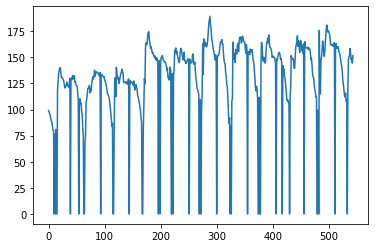

In [62]:
train['Kolkata_Average_Price'].plot()

<AxesSubplot:>

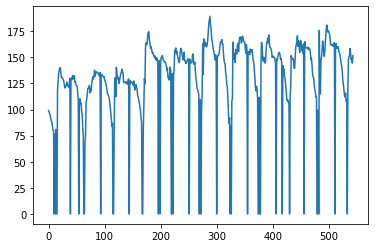

In [73]:
train_tmp1['Kolkata_Average_Price'].plot()

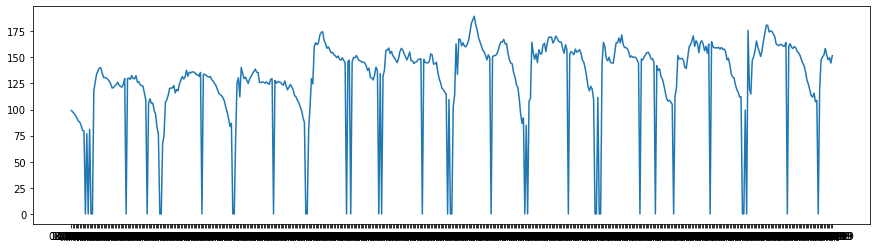

In [72]:
plt.figure(figsize=(15,4))
plt.plot(train_tmp1['WeekEnding_Date'],train_tmp1['Kolkata_Average_Price'])
plt.show()

In [74]:
train_tmp1.describe()

,Kolkata_Average_Price,Kolkata_Ref_Price,Bangalore_Average_Price,Bangalore_Ref_Price,Cochin_Average_Price,Cochin_Ref_Price,Darjeeling_Average_Price,Darjeeling_Ref_Price,Ernakulam_Average_Price,Ernakulam_Ref_Price,...,Guwahati_Average_Price,Guwahati_Ref_Price,Average,DayOfMonth,Month,Year,WeekDay,WeekNo,DayOfYear,DayCount
count,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,...,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000
mean,128.821379,123.239614,118.306213,112.635331,110.634210,104.949173,93.988860,88.867886,77.532279,74.444265,...,70.374412,68.221691,100.660317,15.659926,6.422794,2013.724265,4.270221,26.042279,179.959559,735312.163603
std,42.270235,43.049906,42.105561,42.459109,37.678558,38.319699,30.078805,30.000116,19.522335,19.480523,...,17.246010,16.596583,13.711767,8.869432,3.454188,3.019470,1.546860,15.044564,105.355044,1103.595440
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,64.171250,1.000000,1.000000,2009.000000,0.000000,1.000000,1.000000,733415.000000
25%,120.457500,109.655000,109.577500,99.092500,104.410000,95.622500,83.132500,80.415000,67.895000,64.640000,...,58.857500,56.845000,89.386429,8.000000,3.000000,2011.000000,4.000000,13.000000,88.750000,734361.250000
50%,139.980000,131.985000,129.210000,122.055000,120.690000,115.210000,98.475000,94.390000,77.240000,74.025000,...,68.985000,66.760000,102.886230,16.000000,6.000000,2014.000000,5.000000,26.000000,178.500000,735317.500000
75%,155.042500,152.122500,144.550000,141.190000,131.602500,128.395000,111.930000,109.200000,92.130000,86.492500,...,84.102500,80.175000,111.793036,23.000000,9.000000,2016.000000,5.000000,39.000000,271.250000,736253.750000
max,189.380000,189.380000,177.290000,177.330000,165.070000,165.070000,137.240000,137.250000,110.750000,110.750000,...,101.730000,101.730000,131.453333,31.000000,12.000000,2019.000000,6.000000,52.000000,366.000000,737394.000000


In [75]:
train_orig.describe()

,Average
count,544.000000
mean,100.660317
std,13.711767
min,64.171250
25%,89.386429
50%,102.886230
75%,111.793036
max,131.453333
